In [1]:
car_img_path='/content/car.jpeg'

In [2]:
car_img_path

'/content/car.jpeg'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

In [4]:
img=cv2.imread(car_img_path)

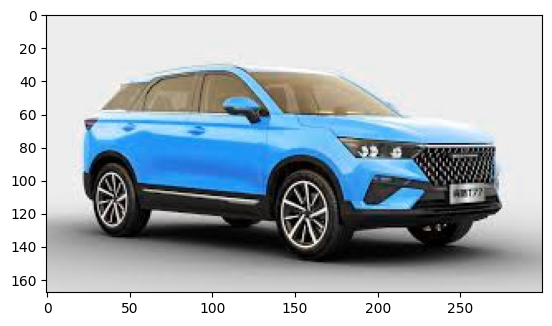

In [5]:
plt.imshow(img)

In [6]:
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

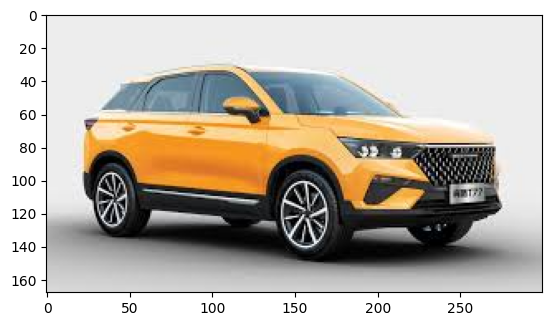

In [7]:
plt.imshow(img2)

In [8]:
img3=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

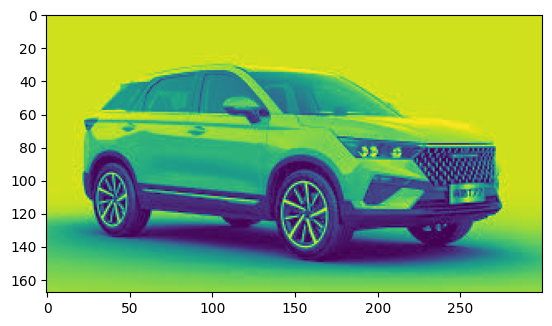

In [9]:
plt.imshow(img3)

In [10]:
from google.colab.patches import cv2_imshow

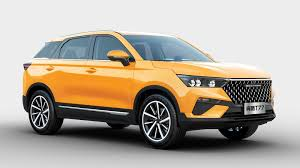

In [11]:
cv2_imshow(img)

In [12]:
img3.shape

(168, 300)

In [13]:
row,col=img3.shape

In [25]:
car=img3.reshape(1,row,col,1)

In [26]:
car.shape

(1, 168, 300, 1)

In [27]:
Conv_layer=tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=car.shape[1:]
)

In [28]:
conv_model=tf.keras.Sequential(Conv_layer)

In [29]:
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


TypeError: Invalid shape (1, 168, 300, 1) for image data

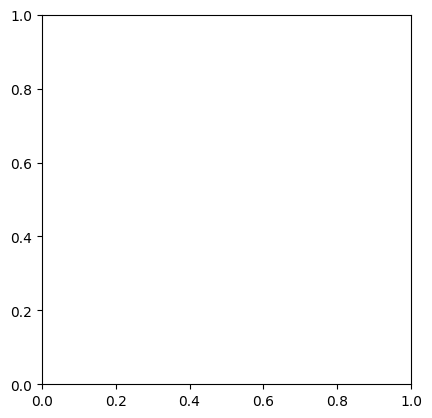

In [30]:
plt.imshow(car,cmap='gray')

In [32]:
output=conv_model.predict(car)

1/1 [==============================] - 0s 60ms/step


In [33]:
output.shape

(1, 166, 298, 1)

In [34]:
row,col=output.shape[1:-1]

In [39]:
reshaped_output=output.reshape(row,col)

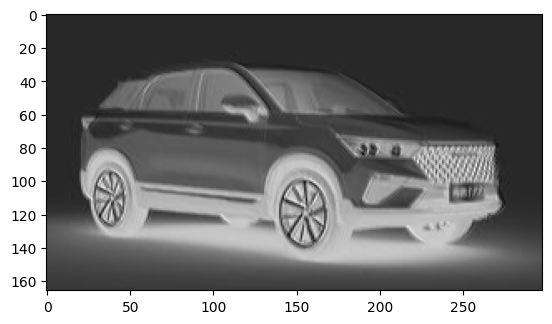

In [40]:
plt.imshow(reshaped_output,cmap='gray')

Colour Image

In [42]:
img2.shape

(168, 300, 3)

In [43]:
color_car=img2

In [44]:
row,col,depth=img2.shape

In [46]:
reshaped_color_img=color_car.reshape(1,row,col,depth)

In [47]:
reshaped_color_img.shape

(1, 168, 300, 3)

In [48]:
CONV_LAYER=[tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=reshaped_color_img.shape[1:]
)]

In [50]:
conv_model=tf.keras.Sequential(CONV_LAYER)

In [51]:
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
colour_output=conv_model.predict(reshaped_color_img)

1/1 [==============================] - 0s 24ms/step


In [55]:
colour_output.shape

(1, 166, 298, 1)

In [56]:
row,col=colour_output.shape[1:-1]

In [58]:
reshaped_out=colour_output.reshape(row,col)

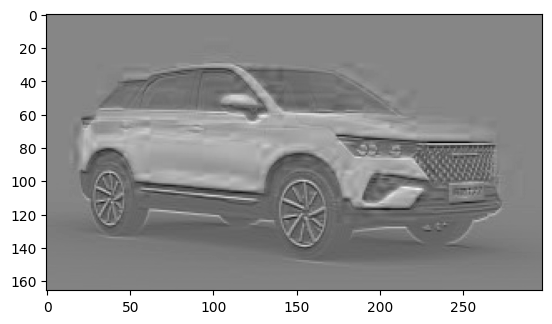

In [60]:
plt.imshow(reshaped_out,cmap='gray')

Pooling

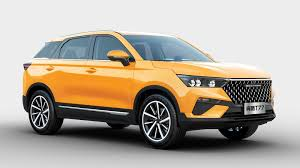

In [61]:
cv2_imshow(img)

In [62]:
def reshaping_in(img,grayscale=True):
  if grayscale:
    row,col=img.shape
    img=img.reshape(1,row,col,1)
    return img
  row,col,depth=img.shape
  color_img=img.reshape(1,row,col,depth)
  return color_img

In [63]:
def max_pooling(img, pool_size=(2,2),strides=(2,2)):
  reshaped_img=reshaping_in(img,grayscale=False)
  pooling_layer=tf.keras.layers.MaxPool2D(pool_size=pool_size,strides=strides)
  result=pooling_layer(reshaped_img)
  return result

In [64]:
result=max_pooling(color_car)

In [65]:
result.shape

TensorShape([1, 84, 150, 3])

In [66]:
def plot(result):
  _,row,col,_=result.shape
  reshaped_img=tf.reshape(result,(row,col,3))
  plt.imshow(reshaped_img)

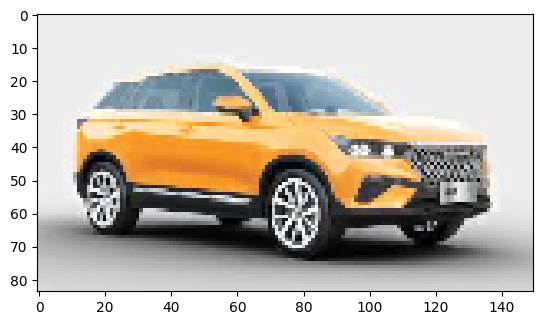

In [68]:
plot(result)

In [69]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [70]:
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=(1,1),
                                      input_shape=input_shape,
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [71]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 113ms/step
(1, 166, 298, 10)


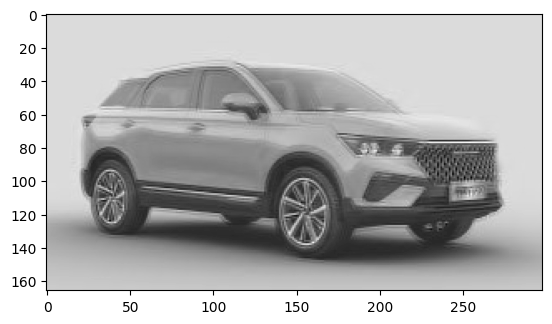

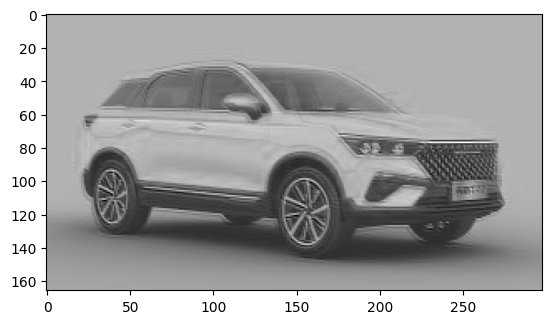

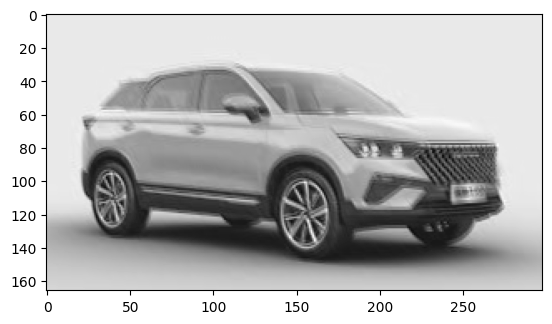

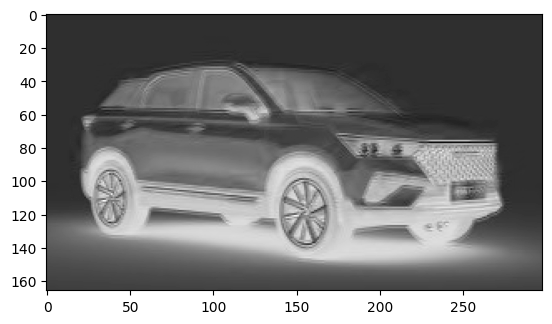

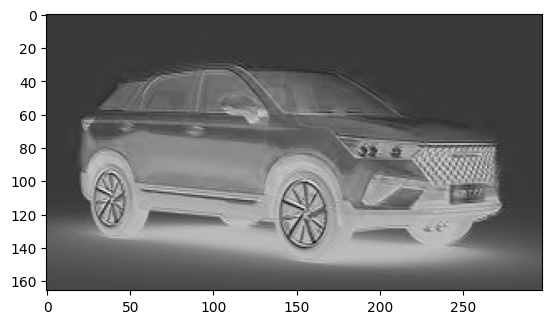

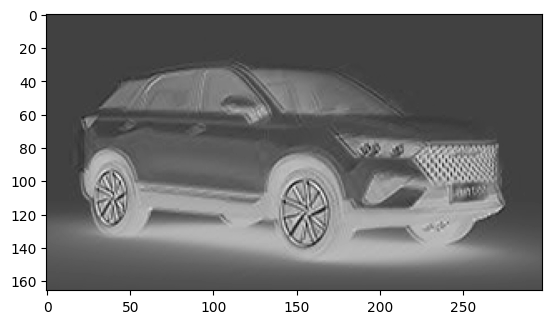

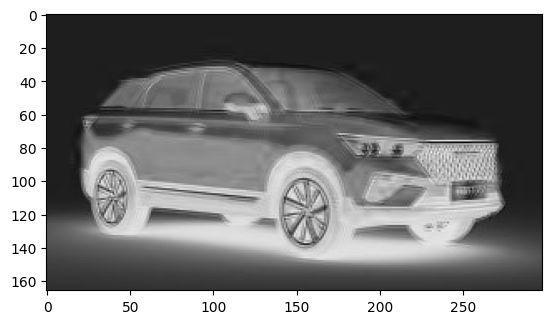

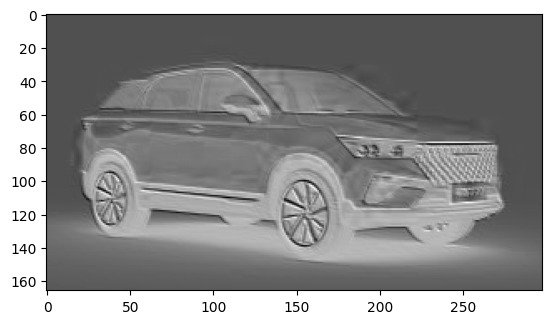

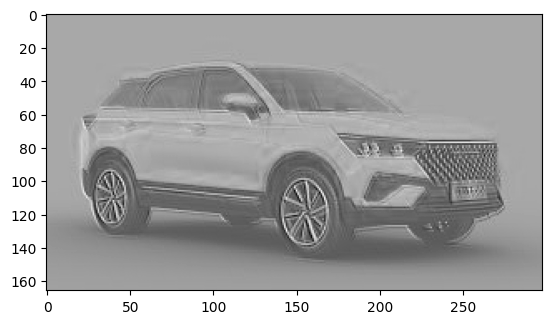

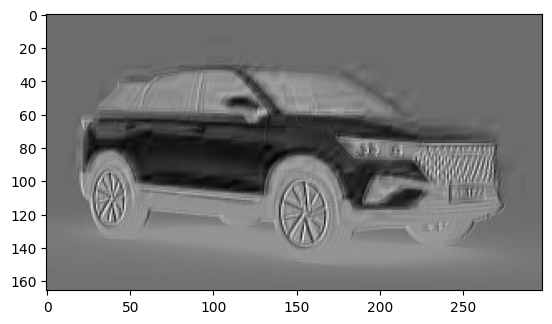

In [72]:
input_img=reshaping_in(color_car,grayscale=False)
model=get_conv_model(filters=10,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img,model)